In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

# pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("./movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# Data Cleaning

 - Filling the missing/null values
 - drop duplicates
 - correct the values like datetime to year
 - converting the data type

In [7]:
# fill missing values inthe columns using mean - only float data type columns used
df[["score","budget","gross","runtime"]]= df[["score","budget","gross","runtime"]].fillna(df[["score","budget","gross","runtime"]].mean())

In [8]:
#Now convert theri datatype from float to int
df[["score","budget","gross","runtime"]]= df[["score","budget","gross","runtime"]].astype('int64')

In [9]:
# fill the objects columns using random values
df.fillna({"rating":"Not given",
          "released":"not mentioned",
          "votes":"not given",
          "writer":"not mentioned",
          "star":"not given",
          "country":"not given",
          "company":"not mentioned"},inplace=True)

In [10]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [11]:
#drop duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not given,Drama,2020,"October 23, 2020 (United States)",3,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,not mentioned,90
7664,Dream Round,Not given,Comedy,2020,"February 7, 2020 (United States)",4,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90
7665,Saving Mbango,Not given,Drama,2020,"April 27, 2020 (Cameroon)",5,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107
7666,It's Just Us,Not given,Drama,2020,"October 1, 2020 (United States)",6,not given,James Randall,James Randall,Christina Roz,United States,15000,78500541,not mentioned,120


In [12]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124


# Correlation in Python

In [13]:
# df.corr() only works on numeric data
df.corr(method='pearson') # pearson,kendall,spearman

,year,score,budget,gross,runtime
year,1.000000,0.096100,0.265578,0.252042,0.120758
score,0.096100,1.000000,0.059254,0.174156,0.382873
budget,0.265578,0.059254,1.000000,0.711270,0.265289
gross,0.252042,0.174156,0.711270,1.000000,0.241336
runtime,0.120758,0.382873,0.265289,0.241336,1.000000


<AxesSubplot:xlabel='budget', ylabel='gross'>

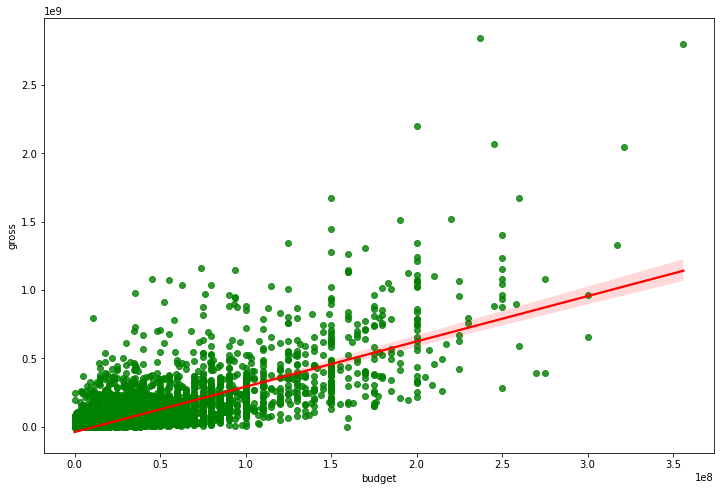

In [14]:
# plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"green"},line_kws={"color":"red"})

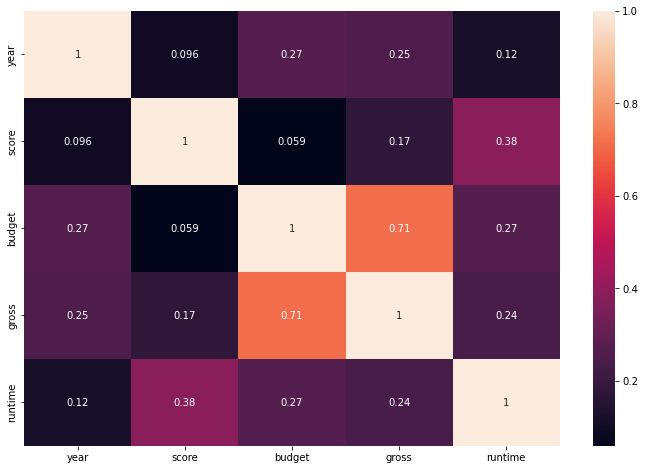

In [15]:
correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [16]:
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1705,8,914,2589,4014,1047,54,19000000,46998772,2319,146
1,5573,7,1,1980,1492,5,393,2269,1632,327,55,4500000,58853106,731,104
2,5142,5,0,1980,1771,8,927,1111,2567,1745,55,18000000,538375067,1540,124
3,286,5,4,1980,1492,7,548,1301,2000,2246,55,3500000,83453539,1812,88
4,1027,7,4,1980,1543,7,436,1054,521,410,55,6000000,39846344,1777,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,4,6,2020,2964,3,2,1500,2289,2421,55,7000,78500541,2384,90
7664,1678,4,4,2020,1107,4,6,774,2614,1886,55,35589876,78500541,539,90
7665,4717,4,6,2020,193,5,3,2061,2683,2040,55,58750,78500541,941,107
7666,2843,4,6,2020,2817,6,936,1184,1824,450,55,15000,78500541,2384,120


In [17]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

name     name        1.000000
         rating     -0.011090
         genre       0.016355
         year        0.011453
         released   -0.010480
                       ...   
runtime  country    -0.079322
         budget      0.265289
         gross       0.241336
         company     0.030868
         runtime     1.000000
Length: 225, dtype: float64